In [40]:
from sklearn.metrics import pairwise_distances
from scipy import stats


class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, x_l, x_u, y_l):
        self.W = pairwise_distances(x_l, x_u, metric='cosine')
        self.labels = y_l

    def score(self, Yu):
        return (self.predict() == Yu).mean()

    def predict(self):
        idx = np.argsort(self.W, axis=0)[:self.k]
        bag = self.labels[idx]
        predict, _ = stats.mode(bag, axis=0)
        return predict.reshape((-1))

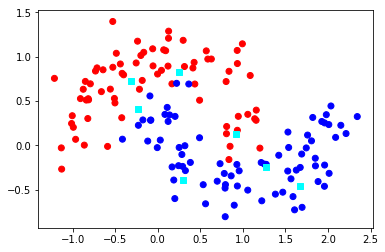

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

n = 800   # 样本数
n_labeled = 150 # 有标签样本数
X, Y = make_moons(n, shuffle=True, noise=0.2, random_state=1000)

x_l, x_u = X[:n_labeled], X[n_labeled:]
y_l, y_u = Y[:n_labeled], Y[n_labeled:]

color = ['red' if l == 0 else 'blue' for l in y_l]
plt.scatter(x_l[:, 0], x_l[:, 1], color=color)
plt.scatter(x_u[:, 0][:7], x_u[:, 1][:7], marker = 's', color='cyan')
plt.show()

In [42]:
M = KNN(1)
M.fit(x_l, x_u, y_l)
print("The score of Diffusion by knn is %f" % M.score(y_u))

The score of Diffusion by knn is 0.781538


In [44]:
M = KNN(10)
M.fit(x_l, x_u, y_l)
print("The score of Diffusion by knn is %f" % M.score(y_u))

The score of Diffusion by knn is 0.847692


In [45]:
a = 'Classification of semi-supervised images based on deep learning'

In [46]:
a.upper()

'CLASSIFICATION OF SEMI-SUPERVISED IMAGES BASED ON DEEP LEARNING'